In [2]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 

/tmp/ipykernel_3285201/2094425688.py:6: RuntimeWarning: divide by zero encountered in divide
  q1 = qianzhong/qiankuan
/tmp/ipykernel_3285201/2094425688.py:9: RuntimeWarning: divide by zero encountered in divide
  q2 = houzhong/houkuan


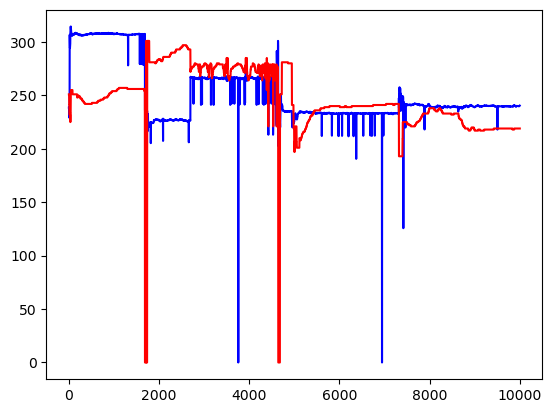

In [23]:
datatest = np.array(pd.read_excel('datatest.xlsx').values)
pre = np.array(pd.read_csv('pred_MLP.csv').values)[:,1]
#datatest = datatest[:,-3]
qiankuan = datatest[:,24]
qianzhong = datatest[:,-7]
q1 = qianzhong/qiankuan
houkuan = datatest[:,8]
houzhong = datatest[:,-6]
q2 = houzhong/houkuan
""" datatest = (datatest-datatest.mean())/datatest.std()
from sklearn.metrics import mean_squared_error
loss = mean_squared_error(pre[2000:10000,],datatest[2000:10000,],squared=False)
print(loss) """
figure = plt.figure(0)
x= list(range(1,len(qiankuan)+1))
plt.plot(x,qiankuan,c='blue')
plt.plot(x,houkuan,c='red')

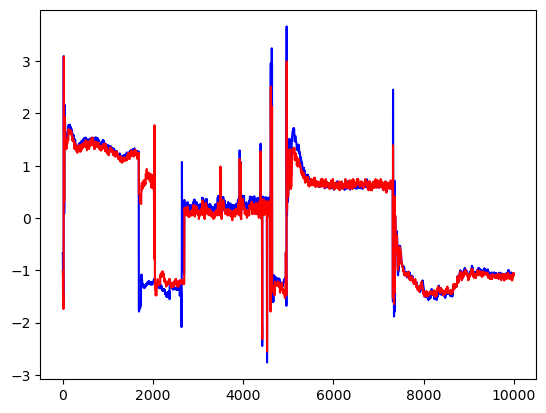

In [6]:
figure = plt.figure(0)
x= list(range(1,len(pre)+1))
plt.plot(x,pre,c='blue')
plt.plot(x,datatest,c='red')


训练的参数在in_proj_weight and out_proj_weight

In [1]:
import torch
import torch.nn as nn
import torch.functional as F
import math
import pandas as pd
import os
import  torch.optim as optim
from torch.utils.tensorboard import SummaryWriter
from sklearn.preprocessing import StandardScaler
d_model = 32#QKV空间维度
n_head = 8#头个数   

#配置文档
device = 'cuda' if torch.cuda.is_available() else 'cpu'
config = {
    'seed': 2332030,      # Your seed number, you can pick your lucky number. :)
    'select_all': False,   # Whether to use all features.
    'valid_ratio': 0.2,   # validation_size = train_size * valid_ratio
    'n_epochs': 20000,     # Number of epochs.            
    'batch_size': 256, 
    'learning_rate': 1e-3,              
    'early_stop': 600,    # If model has not improved for this many consecutive epochs, stop training.     
    'save_path': './models/model.ckpt'  # Your model will be saved here.
}

input_dim = 10
#网络结构

class My_Model(nn.Module):
    def __init__(self, input_dim):
        super(My_Model,self).__init__()
        self.relu = nn.ReLU()
        self.w_q = nn.Linear(input_dim,input_dim)
        self.w_k = nn.Linear(input_dim,input_dim)
        self.w_v = nn.Linear(input_dim,input_dim)
        self.w_combine = nn.Linear(input_dim,input_dim)
        self.softmax = nn.Softmax(dim=-1)
        self.linear = nn.Linear(10,1)
    def forward(self,x):
        q = self.w_q(x)
        k = self.w_k(x)
        v = self.w_v(x)
        score = q @ k.transpose(0,1)
        score = self.softmax(score) @ v
        attention = self.w_combine(score)
        x = self.relu(self.linear(attention))
        x = x.squeeze(1)
        return x


a=torch.rand(1999,10)
b=a
#b= b.view(4,250,32) #reshape
net = My_Model(input_dim)
output = net(b)
print(output, output.shape)

tensor([0., 0., 0.,  ..., 0., 0., 0.], grad_fn=<SqueezeBackward1>) torch.Size([1999])


In [5]:
import pandas as pd 
import numpy as np
a = pd.read_csv('pred_螺旋轨迹.csv')
b = np.array(a.values)
print(b)

[[0 '[1.9380494  0.06423296]']
 [1 '[1.9376196  0.07824847]']
 [2 '[1.9371902 0.0922507]']
 ...
 [896 '[-0.43397227  0.29350305]']
 [897 '[-0.43675998  0.2830556 ]']
 [898 '[-0.4391747  0.2724006]']]
